In [249]:
import pandas as pd 
import numpy as np 

In [250]:
df = pd.read_csv(r'c:\Users\singh\Downloads\Student Depression Dataset.csv')

In [251]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [252]:
print(df.columns)
df = df.drop(columns=['id'])


Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [253]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [254]:
## CHECKING THE CITY NAMES AND COUNTS
df['City'].value_counts()


City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [255]:
#cities less than 300 are being removed
cities_to_remove = df['City'].value_counts()[df['City'].value_counts() < 400]
df = df[~df['City'].isin(cities_to_remove.index)]
df['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [256]:
df['Profession'].value_counts()

Profession
Student                   27844
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [257]:
#removing profession which are not student
df = df.loc[df['Profession'] == 'Student']
df['Profession'].value_counts()

Profession
Student    27844
Name: count, dtype: int64

In [258]:
#dropping profession because we have only one profession which is now only Student
df = df.drop(['Profession'], axis=1)

In [259]:
df = df.drop(['Work Pressure'], axis=1)
df.head(3)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [260]:
## CHECKING THE ACADEMIC PRESSURE AND COUNTS
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    7441
5.0    6283
4.0    5146
1.0    4796
2.0    4169
0.0       9
Name: count, dtype: int64

In [261]:
#removing less counts
df = df.loc[df['Academic Pressure'] > 0]
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    7441
5.0    6283
4.0    5146
1.0    4796
2.0    4169
Name: count, dtype: int64

In [262]:
df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6346
2.0    5827
3.0    5808
1.0    5437
5.0    4414
0.0       3
Name: count, dtype: int64

In [263]:
df = df.loc[df['Study Satisfaction'] > 0]
df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6346
2.0    5827
3.0    5808
1.0    5437
5.0    4414
Name: count, dtype: int64

In [264]:
#removing job satisfaction columns
df = df.drop(columns=['Job Satisfaction'],axis = 1)

In [265]:
df.head(4)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1


In [266]:
#checking Sleep duration
df['Sleep Duration'].value_counts()

df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8290
7-8 hours            7325
5-6 hours            6169
More than 8 hours    6030
Others                 18
Name: count, dtype: int64

In [267]:
## CHANGING SLEEP DURATION TO NUMERICAL 
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sleep Duration' column
df['Sleep Duration'] = label_encoder.fit_transform(df['Sleep Duration'])

# Display the counts of each unique value
print(df['Sleep Duration'].value_counts())



Sleep Duration
2    8290
1    7325
0    6169
3    6030
4      18
Name: count, dtype: int64


In [269]:
#CHECKING DIEATARY HABITS AND REMOVING 'OTHERS' DUE LOW COUNTS
df['Dietary Habits'].value_counts()
df= df.loc[df['Dietary Habits'] != 'Others']
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10292
Moderate      9897
Healthy       7631
Name: count, dtype: int64

In [270]:
#changinf into numerical again by label encoder
df['Dietary Habits'] = label_encoder.fit_transform(df['Dietary Habits'])

# Display the counts of each unique value
print(df['Dietary Habits'].value_counts())

Dietary Habits
2    10292
1     9897
0     7631
Name: count, dtype: int64


In [271]:
#checking degrees
df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [273]:
def categorize_degree(degree):
    if any(keyword in degree for keyword in ['BSc', 'BCA', 'B.Ed', 'BHM', 'B.Pharm', 'B.Com', 'BE', 'BA', 'B.Arch', 'B.Tech', 'BBA', 'LLB']):
        return 'Graduated'
    elif any(keyword in degree for keyword in ['MSc', 'MCA', 'M.Ed', 'M.Pharm', 'M.Com', 'ME', 'MA', 'M.Arch', 'M.Tech', 'MBA', 'LLM']):
        return 'Post Graduated'
    elif degree == 'Class 12':
        return 'Higher Secondary'
    return None  

df['New_Degree'] = df['Degree'].apply(categorize_degree)
df = df.loc[df['New_Degree'].notna()]  


In [274]:
df['New_Degree'] = label_encoder.fit_transform(df['New_Degree'])

print(df['New_Degree'].value_counts())

New_Degree
0    13165
2     6582
1     6064
Name: count, dtype: int64


In [275]:
## CHECKING SUICIDAL THOUGHTS
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    16354
No      9457
Name: count, dtype: int64

In [277]:
df['Have you ever had suicidal thoughts ?'] = label_encoder.fit_transform(df['Have you ever had suicidal thoughts ?'])
print(df['Have you ever had suicidal thoughts ?'].value_counts())

Have you ever had suicidal thoughts ?
1    16354
0     9457
Name: count, dtype: int64


In [279]:
## CHECKING THE STUDY HOURS
df['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    3972
12.0    2944
11.0    2686
8.0     2337
6.0     2075
9.0     1871
7.0     1845
0.0     1568
4.0     1479
2.0     1460
3.0     1324
5.0     1176
1.0     1074
Name: count, dtype: int64

In [280]:
## CHECKING THE FINANCIAL STRESS
df['Financial Stress'].value_counts()

Financial Stress
5.0    6212
4.0    5371
3.0    4798
1.0    4739
2.0    4689
Name: count, dtype: int64

In [281]:
## CHECKING THE FAMILY HISTORY OF MENTAL ILLNESS
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     13365
Yes    12446
Name: count, dtype: int64

In [283]:
df['Family History of Mental Illness'] = label_encoder.fit_transform(df['Family History of Mental Illness'])
print(df['Family History of Mental Illness'].value_counts())

Family History of Mental Illness
0    13365
1    12446
Name: count, dtype: int64


In [285]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [287]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
0,1,33.0,Visakhapatnam,5.0,8.97,2.0,0,0,B.Pharm,1,3.0,1.0,0,1,0
1,0,24.0,Bangalore,2.0,5.90,5.0,0,1,BSc,0,3.0,2.0,1,0,0
2,1,31.0,Srinagar,3.0,7.03,5.0,2,0,BA,0,9.0,1.0,1,0,0
3,0,28.0,Varanasi,3.0,5.59,2.0,1,1,BCA,1,4.0,5.0,1,1,0
4,0,25.0,Jaipur,4.0,8.13,3.0,0,1,M.Tech,1,1.0,1.0,0,0,2


In [288]:
## CHECKING FOR NULL VALUES AND REMOVING
df.isnull().sum()
df = df.dropna()

In [289]:
## REMOVING THE ORIGINAL CITY AND OLD DEGREE COLUMN
df = df.drop(['City', 'Degree'], axis=1)

In [290]:
df.head(3)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
0,1,33.0,5.0,8.97,2.0,0,0,1,3.0,1.0,0,1,0
1,0,24.0,2.0,5.90,5.0,0,1,0,3.0,2.0,1,0,0
2,1,31.0,3.0,7.03,5.0,2,0,0,9.0,1.0,1,0,0


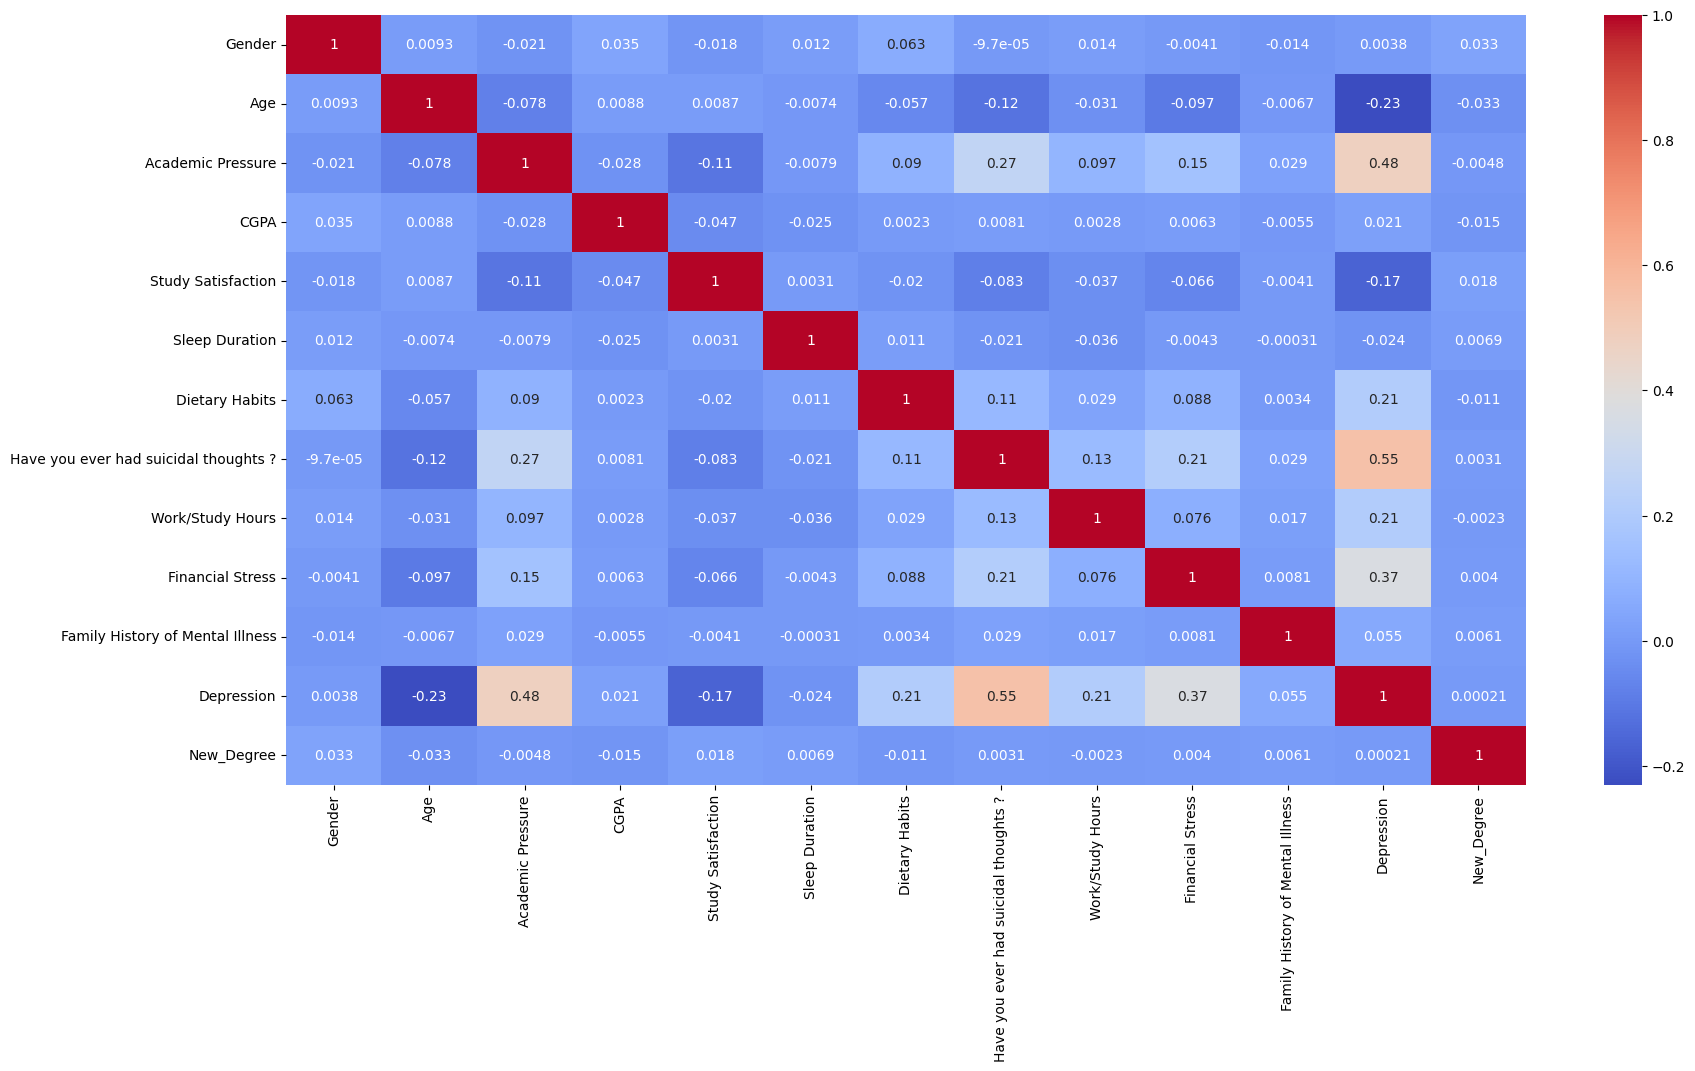

In [292]:
## PLOTTING THE CORRELATION MATRIX
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = df.drop(columns=['Depression'])
y = df['Depression']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [294]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8485083301046106
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2073
           1       0.87      0.88      0.87      3089

    accuracy                           0.85      5162
   macro avg       0.84      0.84      0.84      5162
weighted avg       0.85      0.85      0.85      5162



In [297]:
# NORMALIZING THE DATA FEATURES USING STANDARD SCALER
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## TRAINING THE MODEL USING LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

## SCORE
score = model.score(X_test_scaled, y_test)
print(f"Accuracy: {score*100:.2f}%")

Accuracy: 85.34%


In [299]:
from xgboost import XGBClassifier

# Initializing XGBoost model
xgb = XGBClassifier(random_state=42)
# Trainiing the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluating the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8434715226656335
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2073
           1       0.86      0.88      0.87      3089

    accuracy                           0.84      5162
   macro avg       0.84      0.83      0.84      5162
weighted avg       0.84      0.84      0.84      5162



C:\Users\singh\AppData\Local\Temp\ipykernel_5376\3329482242.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results_ordened.values()),


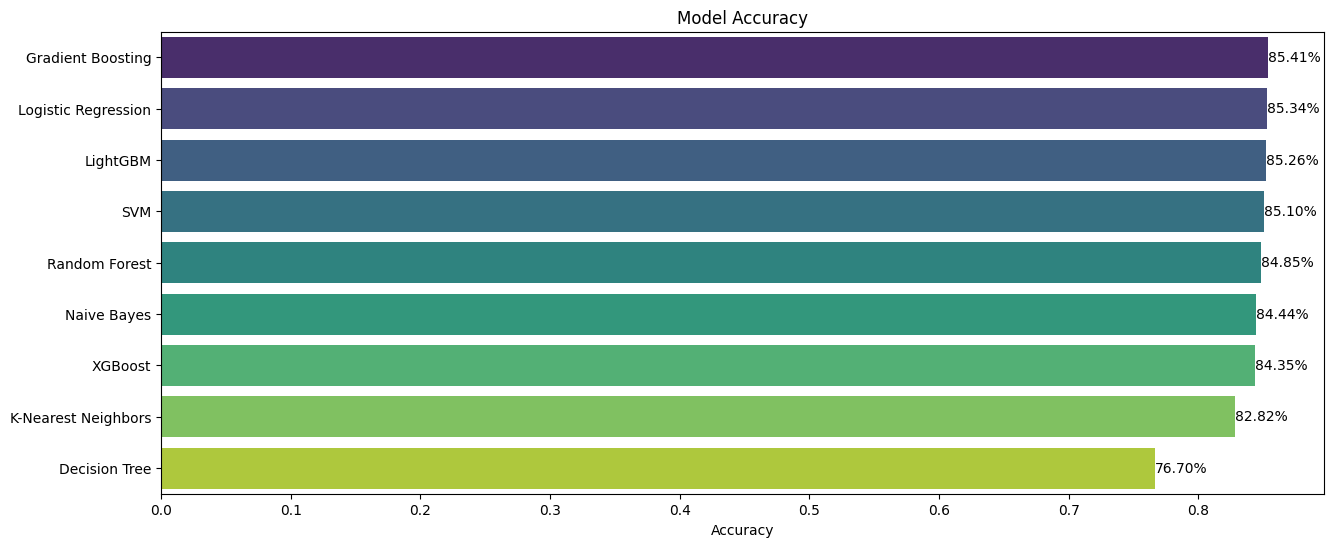

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb

# List of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42, verbose=-1)
}

# Training models and storing accuracy
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled) 
    accuracy = accuracy_score(y_test, y_pred)  
    accuracy_results[name] = accuracy 

# Ordering the accuracy results
accuracy_results_ordened = dict(sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True))

# Plotting the accuracy of each model
plt.figure(figsize=(15, 6))
sns.barplot(x=list(accuracy_results_ordened.values()), 
            y=list(accuracy_results_ordened.keys()), 
            palette='viridis', hue=None)

plt.xlabel('Accuracy')
plt.title('Model Accuracy')

# Adding the accuracy values on top of the bars
for i, v in enumerate(accuracy_results_ordened.values()):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')

plt.show()


In [305]:
import joblib

# Save the model (e.g., RandomForest model)
joblib.dump(df, 'mental_health_rf_model.pkl')


['mental_health_rf_model.pkl']